### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [63]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

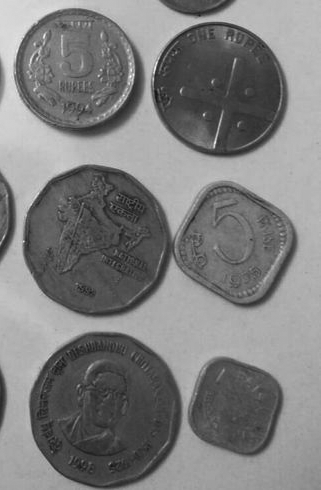

In [64]:
coins = cv2.imread('../dane/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

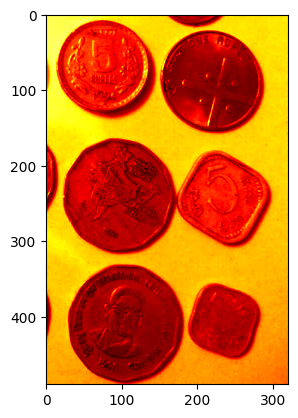

In [65]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

In [66]:
sobelx = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
G = np.sqrt((sobelx**2) + (sobely**2))

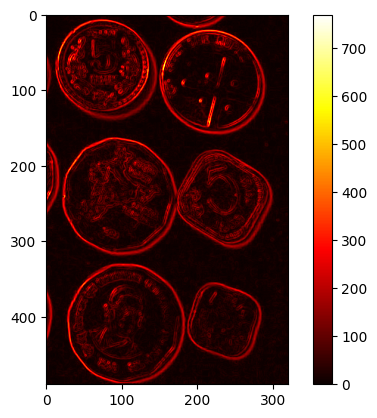

In [67]:
im = plt.imshow(G, cmap='hot')
plt.colorbar(im)

1. Gradnient bliski zeru występuje na jednolitych (czy też bardziej, niemalże jednolitych) obszarach. Czyli w takich w ktorych nie następuje nagła zmiana barwy obrazu. W przypadku monet będzie to tło oraz częściowo środki monet (tam gdzie nie ma żadnej struktury - płaskie części)
2. Obraz mógły posłużyć do detekcji obiektów - zauważalny jest wyższy gradient (~100) na wewnętrznych fragmentach monet oraz jeszcze wyższy na ich krawędziach - obwodach (~200-300). Wyznaczając odpowiednie wartości progu, możlwie jest pozostawienie jedynie konturów monet. 

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

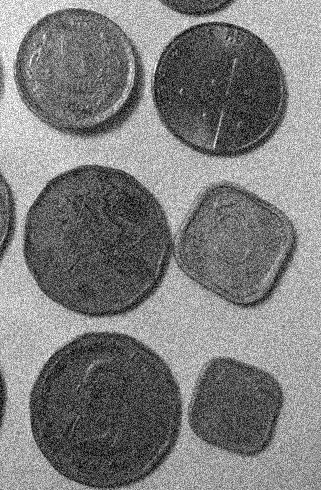

In [68]:
coins_noise = cv2.imread('../dane/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

Bez redukcji szumu:

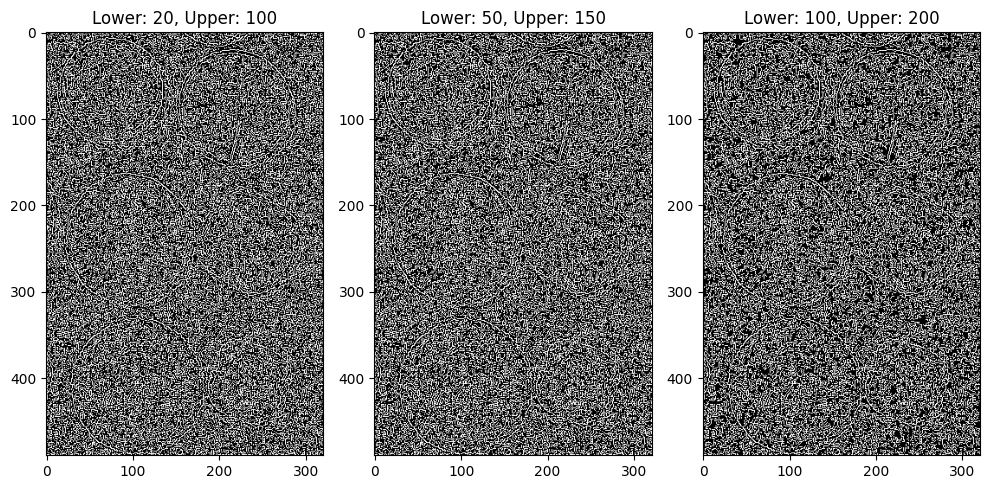

In [69]:
upper_theres = [100, 150, 200]
lower_thres = [20, 50, 100]
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
        plt.subplot(1,3, i+1)
        edges = cv2.Canny(image=coins_noise, threshold1=t[0], threshold2 = t[1])
        plt.imshow(edges, cmap='gray')
        plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()


Gaussian blur:

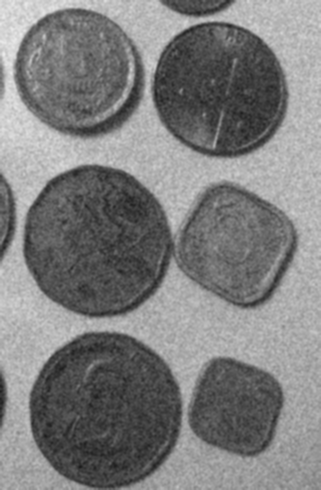

In [70]:
gauss_5 = cv2.GaussianBlur(coins_noise,(5,5),0)
Image.fromarray(gauss_5)

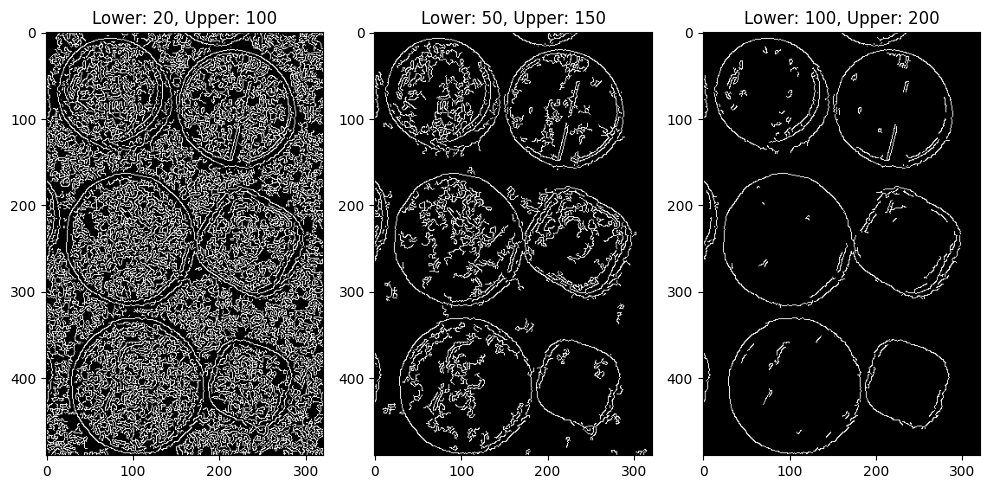

In [71]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=gauss_5, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

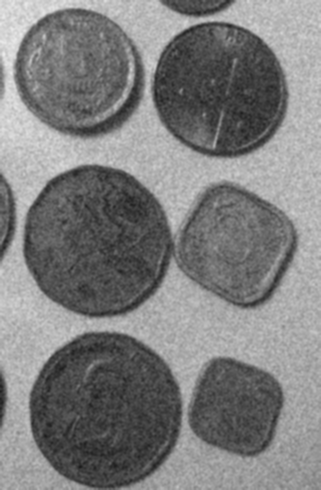

In [72]:
gauss_9 = cv2.GaussianBlur(coins_noise,(9,9),0)
Image.fromarray(gauss_5)

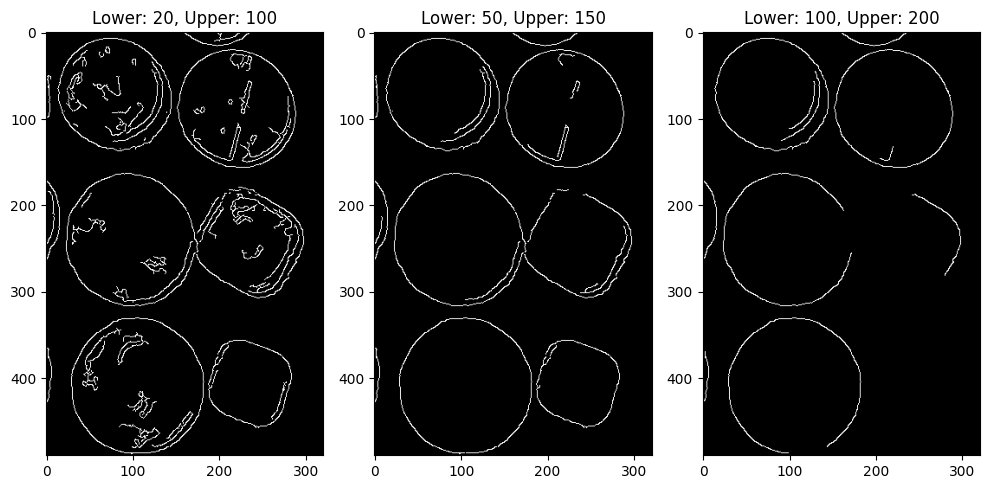

In [73]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=gauss_9, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

Filtr uśredniający:

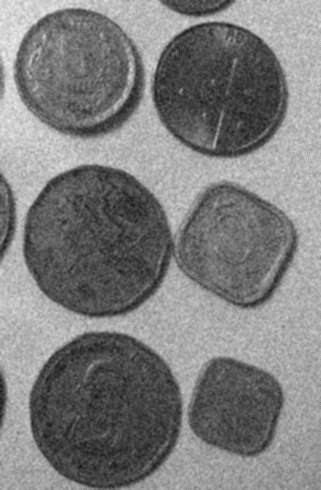

In [74]:
kernel_blur = np.ones((3, 3), np.float32) / 9
mean_img = cv2.filter2D(src=coins_noise, ddepth=-1, kernel=kernel_blur)

Image.fromarray(mean_img)

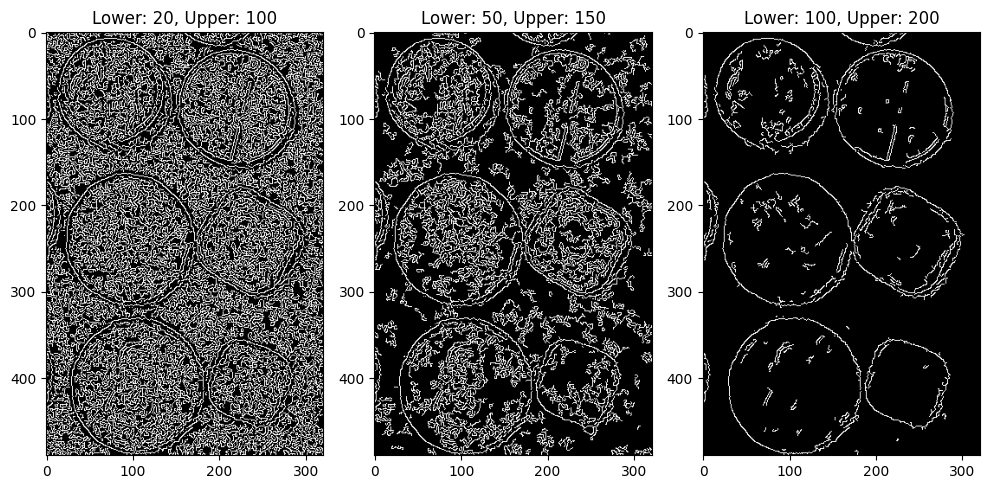

In [75]:
plt.figure(figsize=(10, 10))
for i, t in enumerate(zip(lower_thres, upper_theres)):
    plt.subplot(1,3, i+1)
    edges = cv2.Canny(image=mean_img, threshold1=t[0], threshold2 = t[1])
    plt.imshow(edges, cmap='gray')
    plt.title(f'Lower: {t[0]}, Upper: {t[1]}')
plt.tight_layout()

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

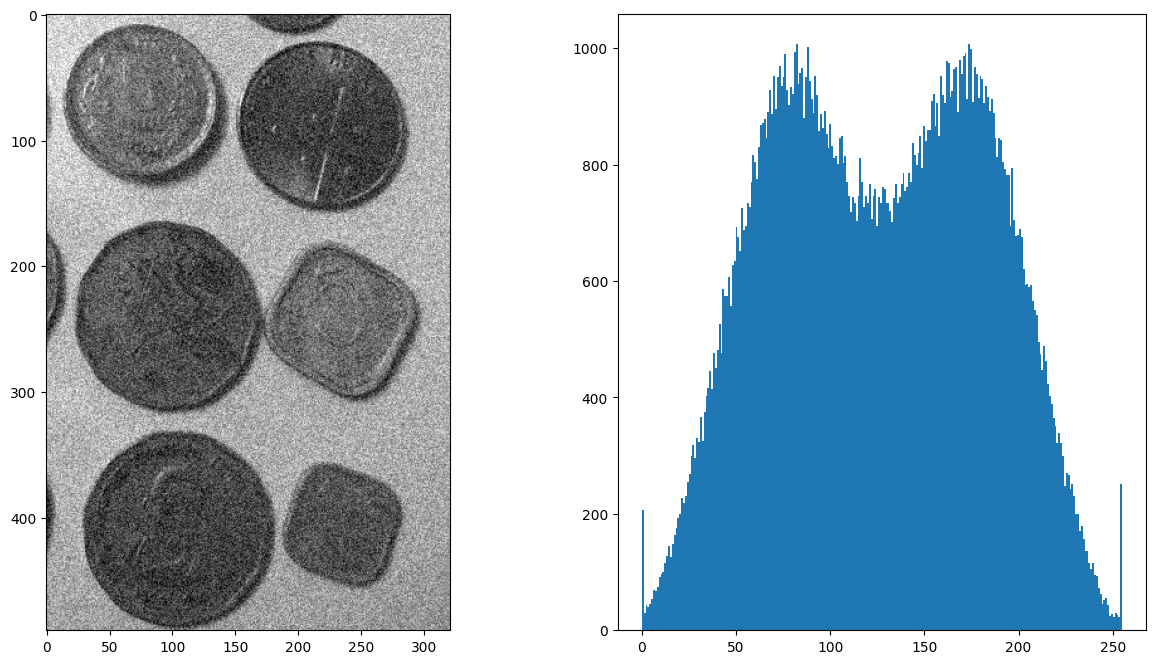

In [76]:
img_values = coins_noise.flatten()
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.imshow(coins_noise, cmap='gray')
plt.subplot(1,2,2)
plt.hist(img_values, bins=256)
plt.show()

Z biblioteki:

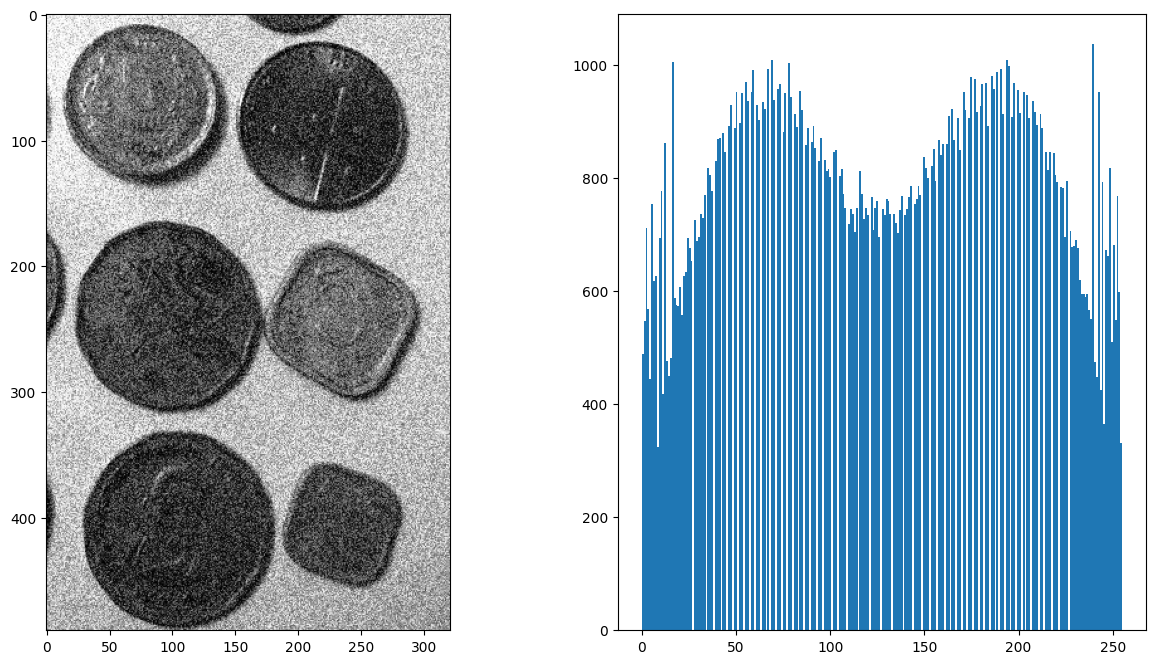

In [77]:
equ = cv2.equalizeHist(coins_noise)
equ_hist = equ.flatten()
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.imshow(equ, cmap='gray')
plt.subplot(1,2,2)
plt.hist(equ_hist, bins=256)
plt.show()

Ręcznie:

In [78]:
def equalize_hist(img):
    hist, _ = np.histogram(img, bins=256)
    # cumulative distribution function - dla każdego elementu obliczamy sumę elementów od 0 do niego
    cdf = hist.cumsum()
    cdf_unique = np.unique(cdf)
    cdf_min = np.delete(cdf_unique,0).min()

    # normalizacja cdf do zakresu 0-255
    normalized_cdf = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
    normalized_cdf = normalized_cdf.astype('uint8')

    # przypisanie nowych wartości pikseli
    img_new = normalized_cdf[coins_noise]
    img_new_hist = img_new.flatten()
    return img_new, img_new_hist 

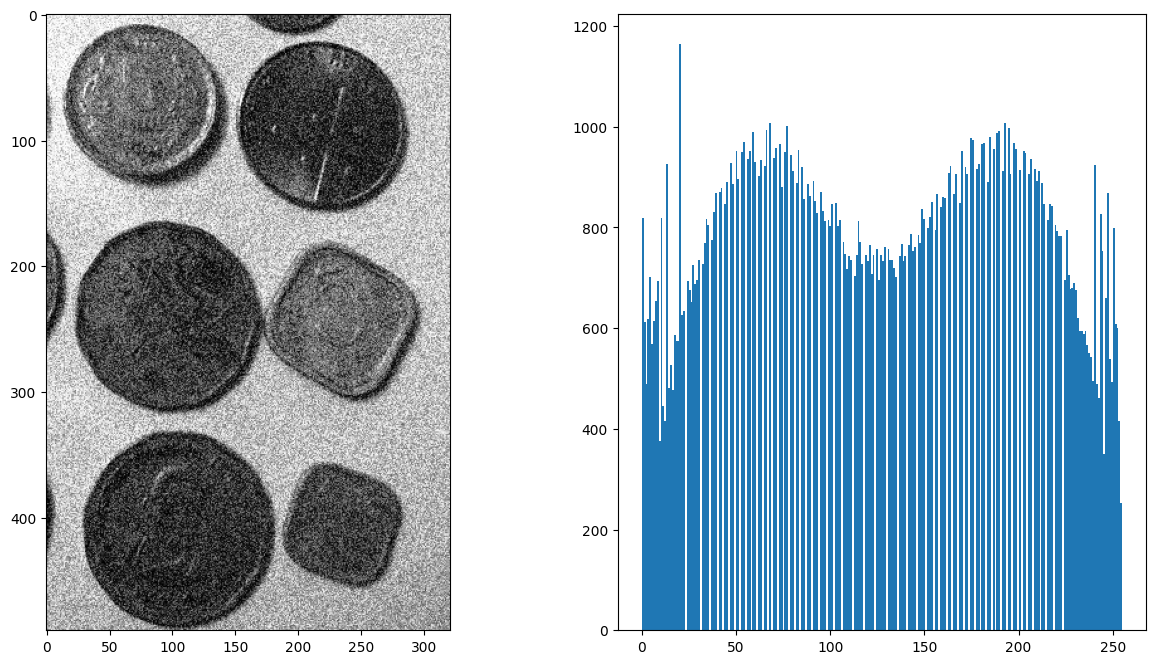

In [79]:
img_new, img_new_hist = equalize_hist(coins_noise)

plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.imshow(img_new, cmap='gray')
plt.subplot(1,2,2)
plt.hist(img_new_hist, bins=256)
plt.show()


---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

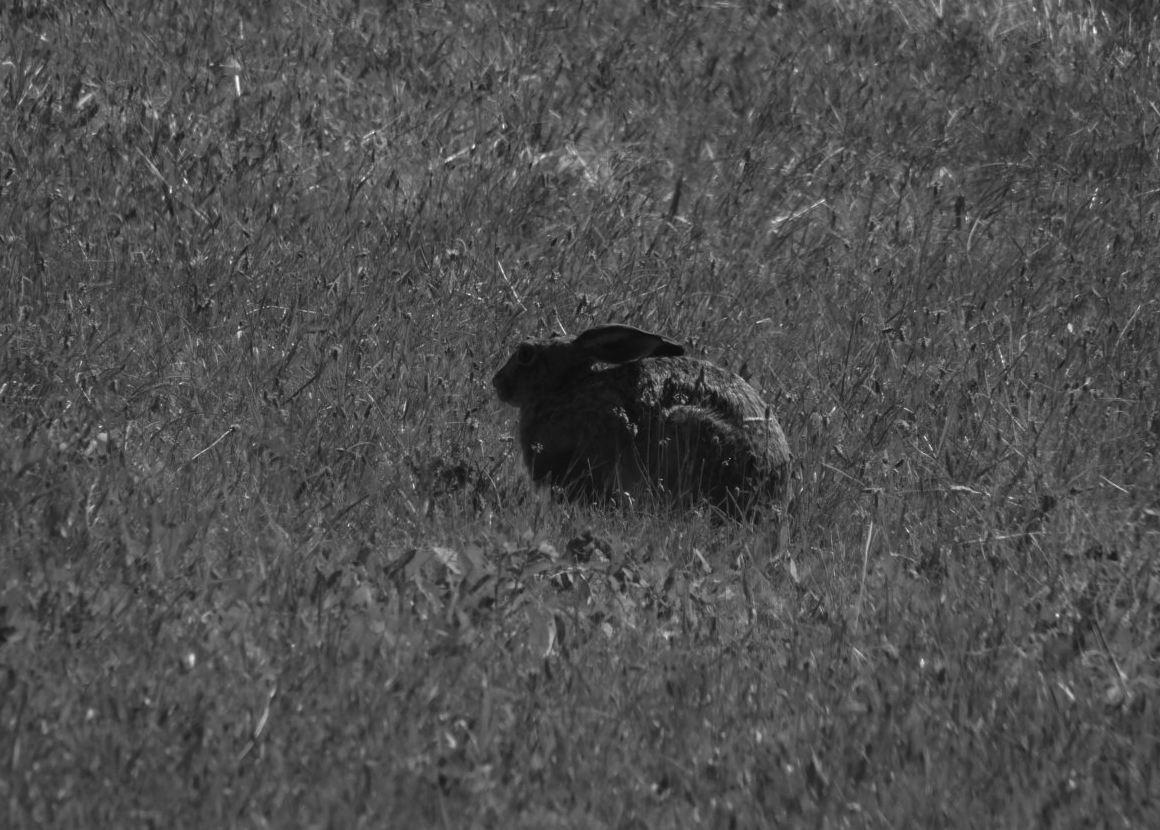

In [80]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

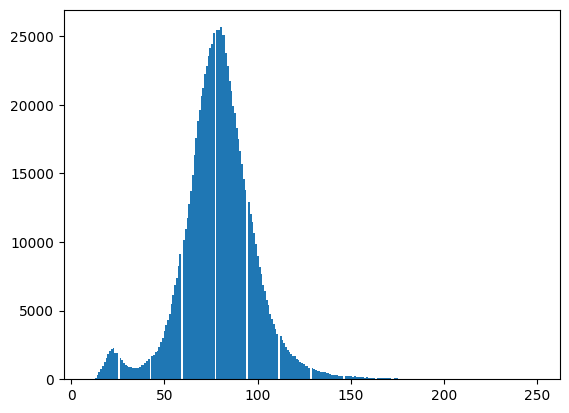

In [81]:
hist = hare_gray.flatten()
plt.hist(hist, bins=256)
plt.show()

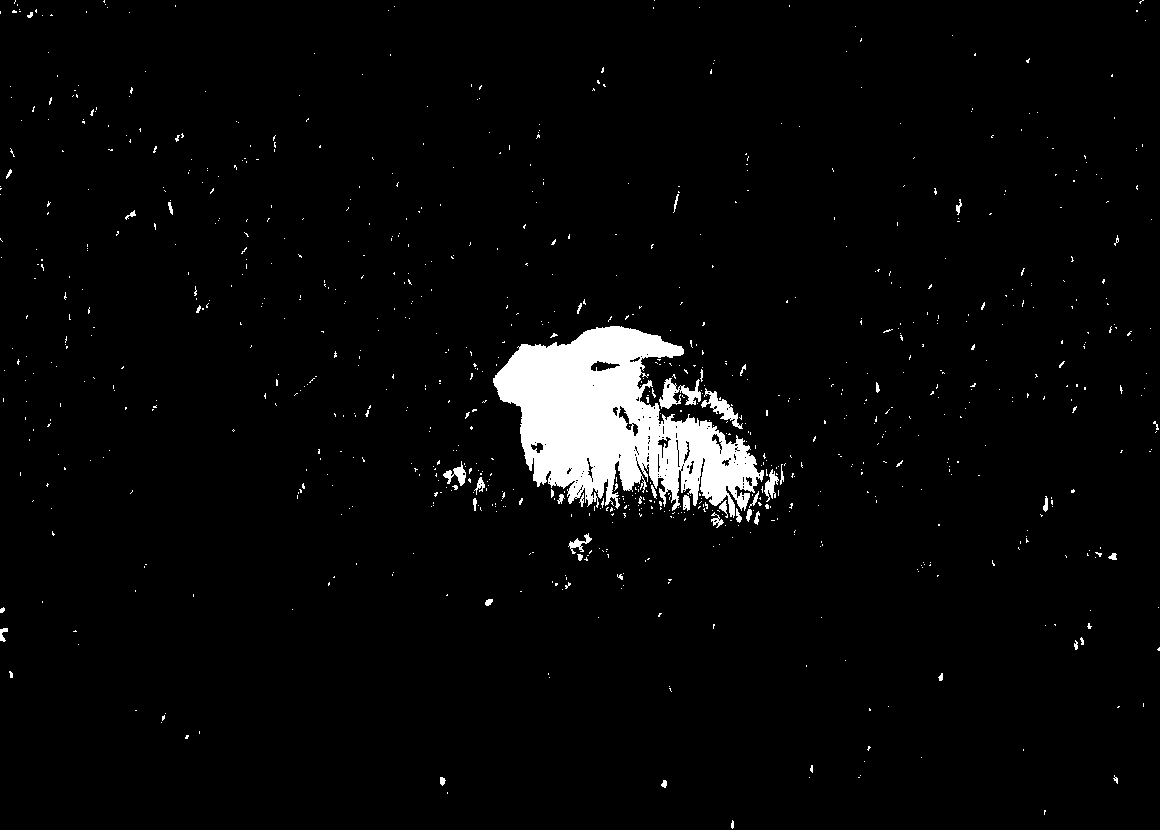

In [82]:
thresholded = cv2.threshold(hare_gray, 40, 255, cv2.THRESH_BINARY_INV)[1]
Image.fromarray(thresholded)

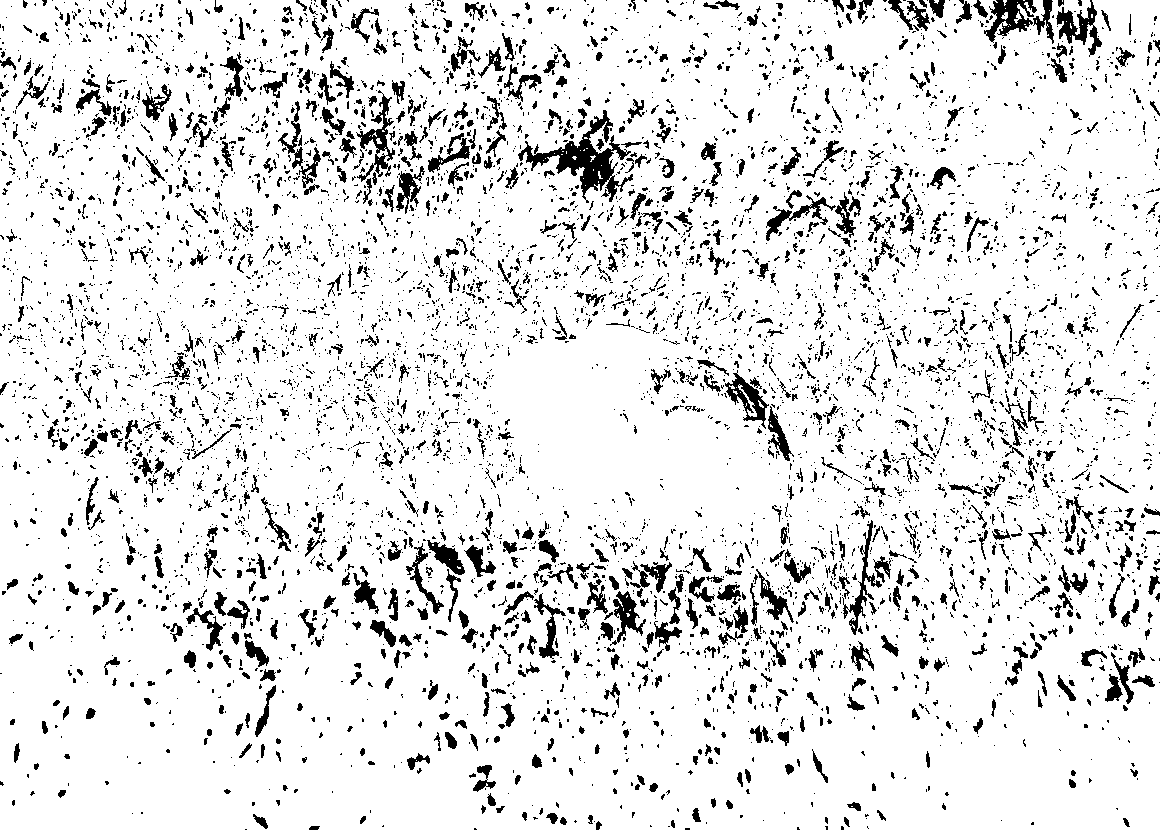

In [83]:
thresholded = cv2.threshold(hare_gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
Image.fromarray(thresholded)

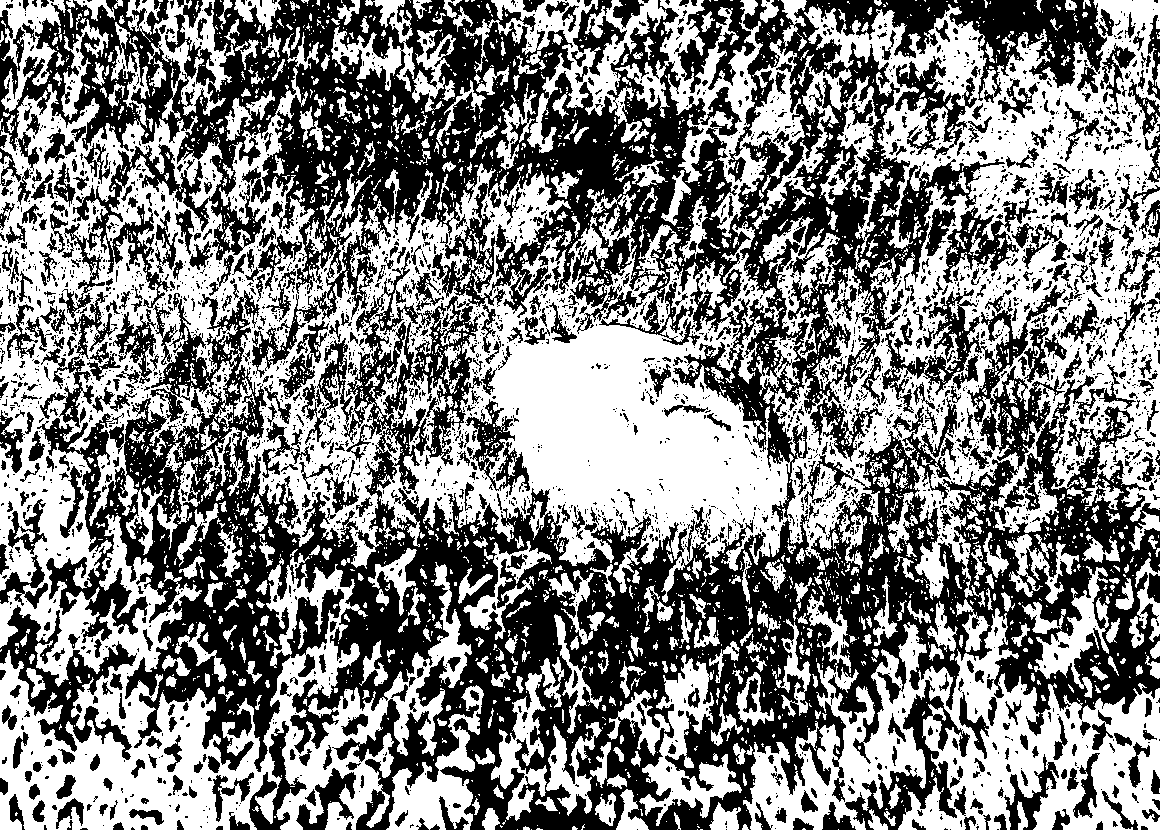

In [84]:
otsu = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
Image.fromarray(otsu)

In [85]:
LUT = np.zeros(256, dtype='uint8')


In [86]:
range = 256
def bimodal_gaussian(mean1, sigma1, mean2, sigma2):
    x = np.arange(range)
    gauss1 = np.exp(-((x - mean1) ** 2) / (2 * sigma1**2))
    gauss2 = np.exp(-((x - mean2) ** 2) / (2 * sigma2**2))
    distribution = gauss1 + gauss2
    return distribution

In [87]:
SIZE = hare_gray.size

In [88]:
def equalize_histogram(img, d_dist):
    normalized_bins = np.array(d_dist) * (SIZE / np.sum(d_dist))
    rounded_bins = np.round(normalized_bins).astype(int)
    target = []
    for value, count in enumerate(rounded_bins):
        target.extend([value] * count)
    target = target[:SIZE]

    original_hist, original_bins = np.histogram(img, bins=256, range=(0, 255))
    dest_hist, dest_bins = np.histogram(target, bins=256, range=(0, 255))

    original_cdf = np.cumsum(original_hist)
    dest_cdf = np.cumsum(dest_hist)

    mapping = np.interp(original_cdf, dest_cdf, dest_bins[:-1])

    mapped = np.interp(img.flatten(), original_bins[:-1], mapping)
    matched = mapped.reshape(hare_gray.shape).astype(np.uint8)

    matched = matched.astype(np.uint8)
    thresholded = cv2.threshold(matched, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

    plt.figure(figsize=(10, 5))
    plt.hist(hare_gray.ravel(), bins=256, range=[0,255], color='blue', alpha=0.5, label='Oryginalny rozkład')
    plt.hist(target, bins=256, range=[0,255], color='red', alpha=0.5, label='Docelowy rozkład')
    plt.hist(matched.ravel(), bins=256, range=[0,255],color='green', alpha=0.5, label='Dopasowany rozkład')
    plt.legend()
    plt.show()

    plt.figure(figsize=(20,15))
    plt.subplot(1, 3, 1)
    plt.imshow(hare_gray, cmap='gray')
    plt.title('Oryginalny obraz')
    plt.subplot(1, 3, 2)
    plt.imshow(matched, cmap='gray')
    plt.title('Dopasowany obraz')
    plt.subplot(1, 3, 3)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Obraz binarny')
    plt.show()


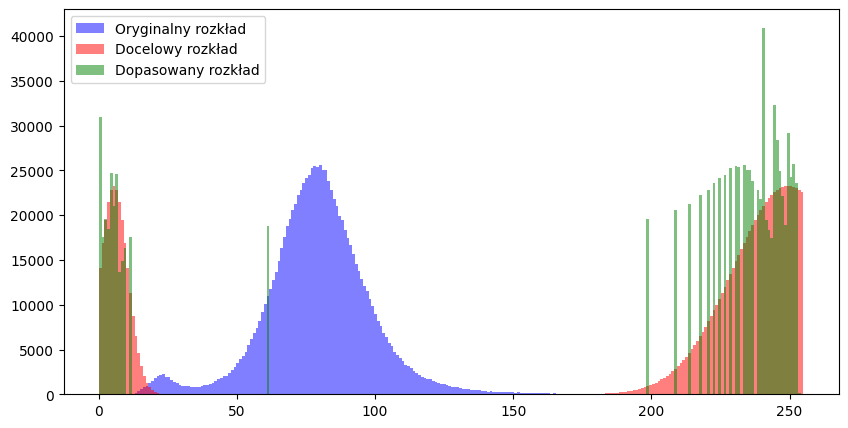

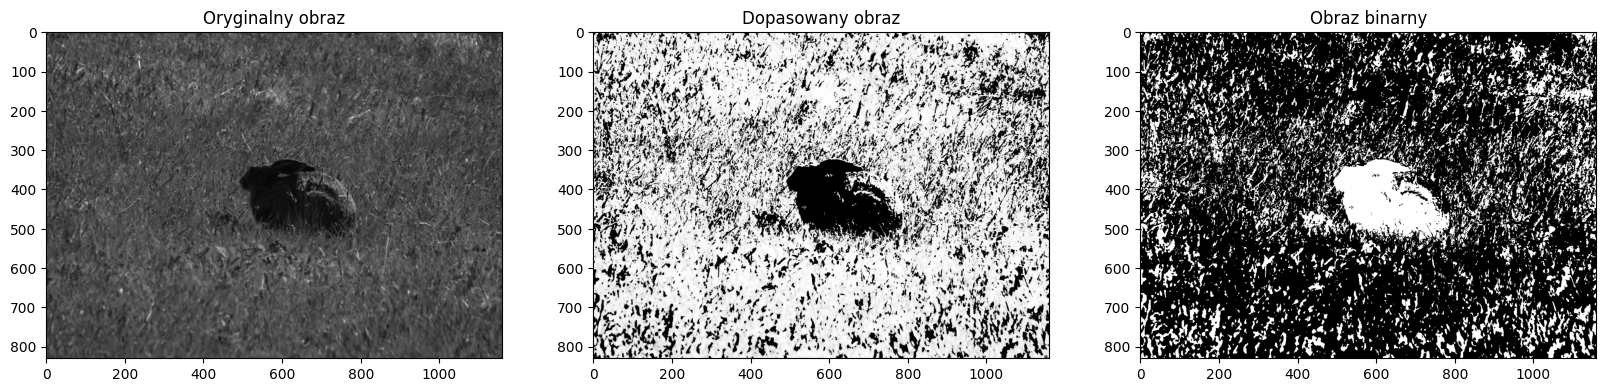

In [89]:
equalize_histogram(hare_gray, bimodal_gaussian(mean1=5, mean2=250, sigma1=5, sigma2=20))

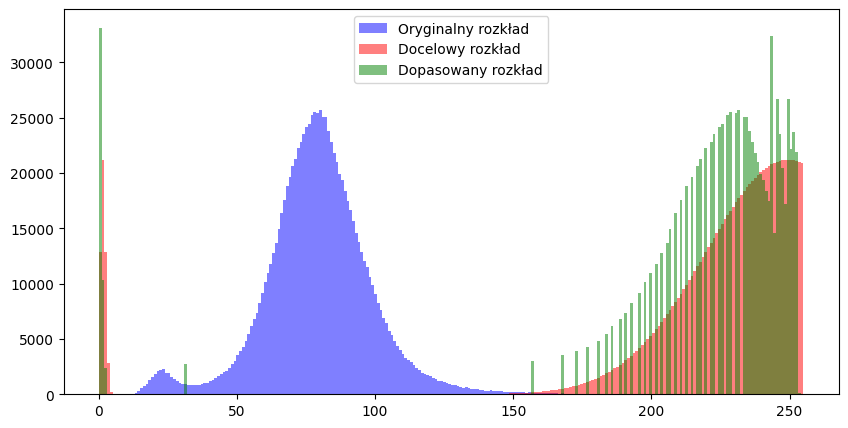

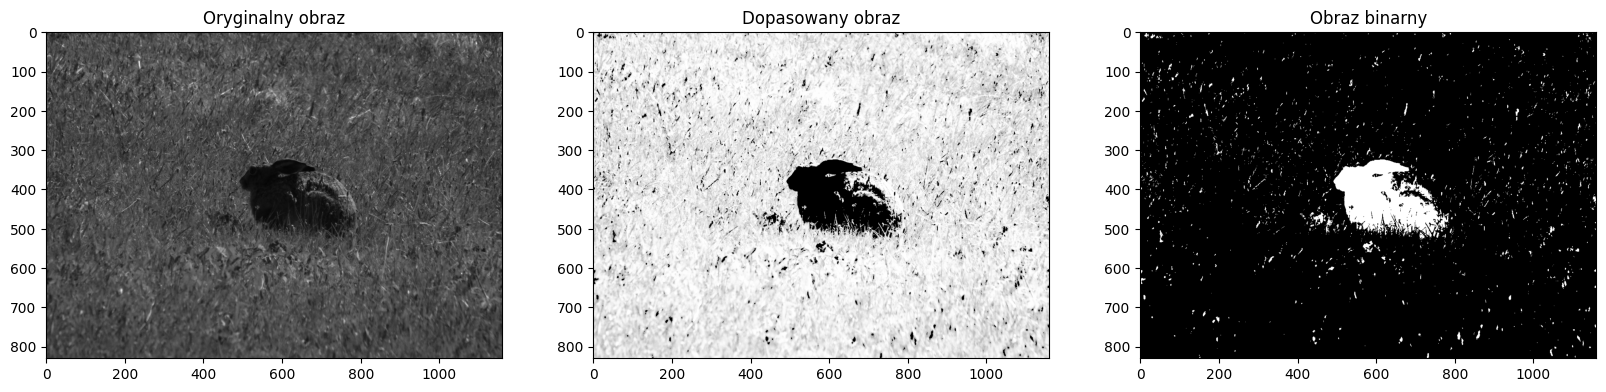

In [90]:
equalize_histogram(hare_gray, bimodal_gaussian(mean1=1, mean2=250, sigma1=1, sigma2=30))

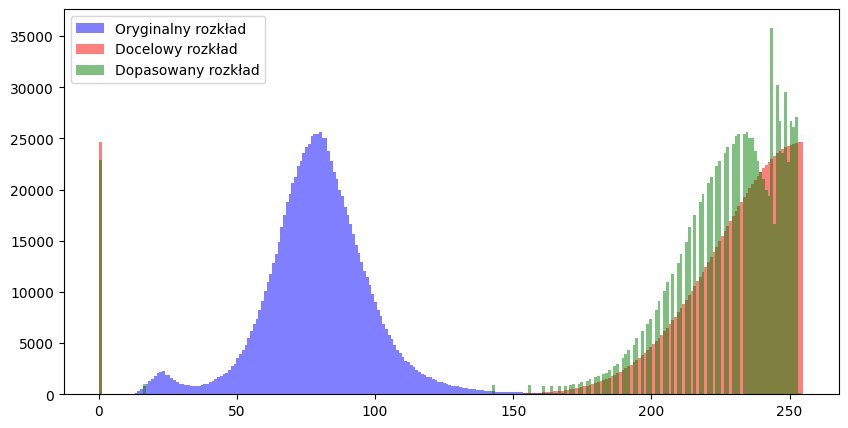

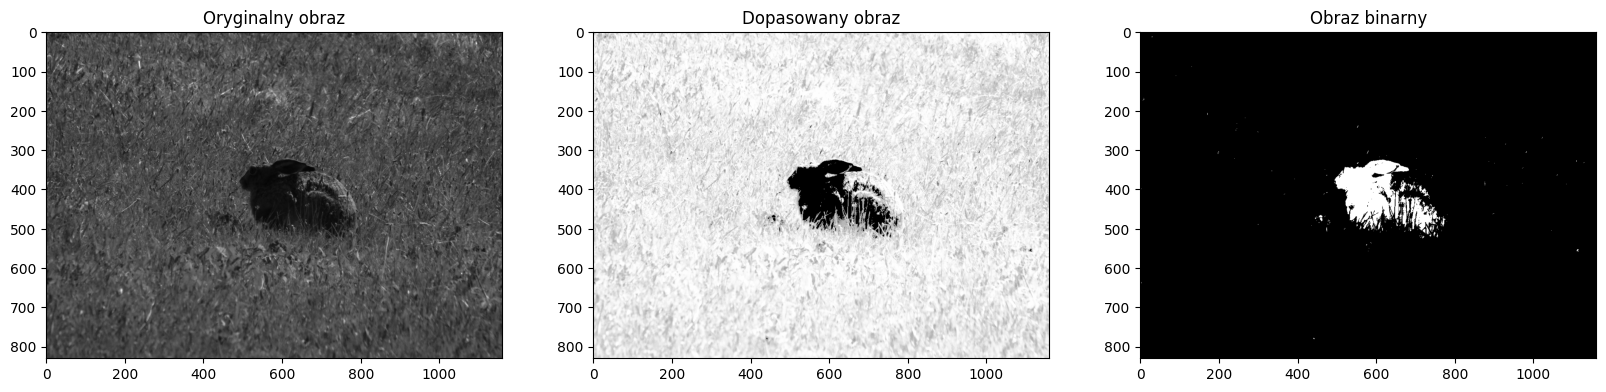

In [91]:
equalize_histogram(hare_gray, bimodal_gaussian(mean1=0, mean2=255, sigma1=0.1, sigma2=30))